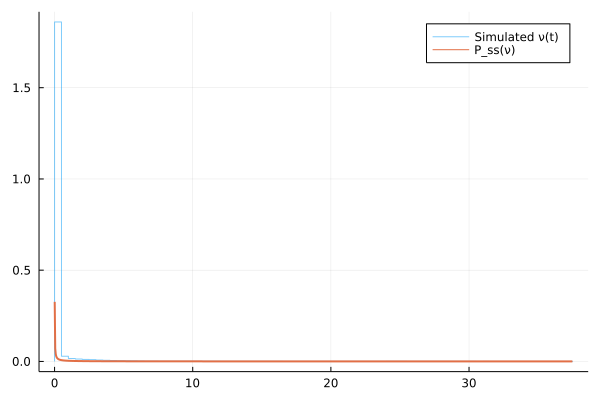

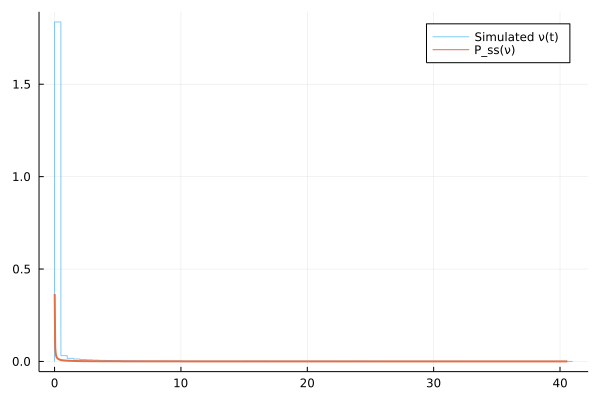

In [3]:
using Plots

# パラメータ設定
ν_0 = 0.01
τ = 1.0
dt = 0.001
T = 10000
N = Int(T / dt)
times = 0:dt:T

# 強度ν(t)を計算する関数
function calculate_intensity(ν_0, n, τ, dt, T)
    z = zeros(T)
    ν = zeros(T)
    ν[1] = ν_0
    for t = 2:T
        z[t] = z[t-1] * exp(-dt/τ) + (rand() < ν[t-1]*dt ? 1 : 0)
        ν[t] = ν_0 + n/τ * z[t]
    end
    return ν
end

# P_ss(ν)の分布を計算する関数
function P_ss(ν, ν_0, τ, n)
    ν_cut = 1 / (2τ * (1 - n))
    P_ss = ν .^ (-1 + 2*ν_0*τ) .* exp.(-2*τ*(1-n).*ν)
    P_ss[ν .> ν_cut] .= 0
    return P_ss / sum(P_ss) # 正規化
end

# ヒストグラムをプロットする関数
function plot_histogram(ν, ν_0, τ, n)
    histogram(ν, bins=100, normed=true, label="Simulated ν(t)", alpha=0.5)
    ν_vals = range(minimum(ν), maximum(ν), length=1000)
    P_vals = P_ss(ν_vals, ν_0, τ, n)
    plot!(ν_vals, P_vals, label="P_ss(ν)", linewidth=2)
end

# n = 0.999 と n = 0.99 の場合についてシミュレーションとプロット
for n in [0.999, 0.99]
    ν = calculate_intensity(ν_0, n, τ, dt, N)
    plot_histogram(ν, ν_0, τ, n)
    display(plot!())
end


$ν^{1}_0$